In [1]:
from keras.applications.resnet50 import ResNet50

resnet50_base_model = ResNet50(weights='imagenet', include_top=False)
#resnet50_trainable_model = ResNet50(weights=None, include_top=False)

Using TensorFlow backend.
W0902 06:22:35.580089 140062309177216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0902 06:22:35.619288 140062309177216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0902 06:22:35.629907 140062309177216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4479: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0902 06:22:35.670424 140062309177216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session inste

94658560/94653016 [==============================] - 1s 0us/step


In [0]:
resnet50_base_model.summary()

In [7]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
## building base model with frozen weights

base_x = resnet50_base_model.output
global_pooling_x = GlobalAveragePooling2D()(base_x)
#add dense layer
dense_layer = Dense(512, activation='relu')(global_pooling_x)
#add final output layer
base_prediction = Dense(3, activation = 'softmax')(dense_layer)

#create the whole network
resnet_transfer_model_1 = Model(input=resnet50_base_model.input, outputs=base_prediction)

#resnet_transfer_model_1.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  del sys.path[0]


In [8]:
resnet_transfer_model_1.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
____________________________________________________________________________________________

In [0]:
import os
import zipfile

local_zip = '/content/testdata.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
  
# base_dir = '/tmp'
# train_dir = os.path.join(base_dir, 'train')
# validation_dir = os.path.join(base_dir, 'test')


# train_cats_dir = os.path.join(train_dir, 'GermanShepherd')
# train_dogs_dir = os.path.join(train_dir, 'GoldenRetriever')
# validation_cats_dir = os.path.join(validation_dir, 'GermanShepherd')
# validation_dogs_dir = os.path.join(validation_dir, 'GoldenRetriever')

# train_cat_fnames = os.listdir(train_cats_dir)
# train_dog_fnames = os.listdir(train_dogs_dir)

# print(train_cat_fnames)

In [0]:
train_path = '/tmp/train' 
validation_path = '/tmp/validation'
test_path = '/tmp/test'

In [15]:

train_batches  = ImageDataGenerator().flow_from_directory(
    train_path, target_size=(224,224), classes = ['GermanShepherd', 'GoldenRetriever', 'SiberianHusky'], batch_size = 50)

validation_batches  = ImageDataGenerator().flow_from_directory(
    validation_path, target_size=(224,224), classes = ['GermanShepherd', 'GoldenRetriever', 'SiberianHusky'], batch_size = 10)

test_batches  = ImageDataGenerator().flow_from_directory(
    test_path, target_size=(224,224), classes = ['GermanShepherd', 'GoldenRetriever', 'SiberianHusky'], batch_size = 10)

Found 1013 images belonging to 3 classes.
Found 280 images belonging to 3 classes.
Found 269 images belonging to 3 classes.


In [16]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

res_train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        fill_mode='nearest',
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

res_test_datagen = ImageDataGenerator(rescale=1./255)

res_train_generator = res_train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

res_validation_generator = res_test_datagen.flow_from_directory(
        validation_path,
        target_size=(224, 224),
        batch_size=10,
        class_mode='categorical')

## set steps per epoch for train
train_filenames_res = res_train_generator.filenames
steps_train_res = len(train_filenames_res)/res_train_generator.batch_size

## set steps per epoch for validation
validation_filenames_res = res_validation_generator.filenames
steps_valid_res = len(validation_filenames_res)/res_validation_generator.batch_size


print(len(validation_filenames_res), " ", steps_valid_res)

Found 1013 images belonging to 3 classes.
Found 280 images belonging to 3 classes.
280   28.0


In [18]:
from keras import optimizers
resnet_transfer_model_1.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

resnet_model_1_fit_generator = resnet_transfer_model_1.fit_generator(
        res_train_generator,
        steps_per_epoch=steps_train_res,
        epochs=30,
        validation_data=res_validation_generator,
        validation_steps=steps_valid_res)

W0902 06:36:32.202902 140062309177216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0902 06:36:32.355631 140062309177216 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
51/50 [==============================] - 48s 938ms/step - loss: 0.2194 - acc: 0.9195 - val_loss: 0.0771 - val_acc: 0.9821
Epoch 2/30
51/50 [==============================] - 34s 672ms/step - loss: 0.0970 - acc: 0.9671 - val_loss: 0.1887 - val_acc: 0.9750
Epoch 3/30
51/50 [==============================] - 34s 672ms/step - loss: 0.0552 - acc: 0.9809 - val_loss: 0.1921 - val_acc: 0.9714
Epoch 4/30
51/50 [==============================] - 34s 674ms/step - loss: 0.0973 - acc: 0.9759 - val_loss: 0.2202 - val_acc: 0.9821
Epoch 5/30
51/50 [==============================] - 34s 673ms/step - loss: 0.0423 - acc: 0.9912 - val_loss: 0.4257 - val_acc: 0.9536
Epoch 6/30
51/50 [==============================] - 34s 673ms/step - loss: 0.0263 - acc: 0.9877 - val_loss: 0.2998 - val_acc: 0.9750
Epoch 7/30
51/50 [==============================] - 34s 673ms/step - loss: 0.0336 - acc: 0.9912 - val_loss: 0.4389 - val_acc: 0.9500
Epoch 8/30
51/50 [==============================] - 34s 674ms/step - 

In [0]:
model_json = resnet_transfer_model_1.to_json()
with open("model.json", "w") as json_file : 
    json_file.write(model_json)

In [0]:
resnet_transfer_model_1.save_weights("model.h5")

In [0]:
resnet_transfer_model_1.save('resnet50_frozen_model.h5')

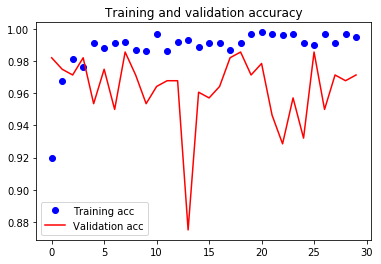

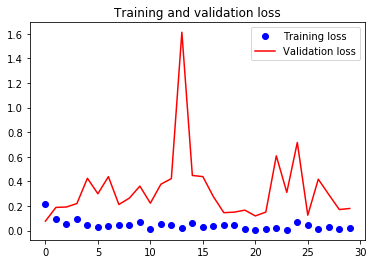

In [22]:
import matplotlib.pyplot as plt

acc = resnet_model_1_fit_generator.history['acc']
val_acc = resnet_model_1_fit_generator.history['val_acc']
loss = resnet_model_1_fit_generator.history['loss']
val_loss = resnet_model_1_fit_generator.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color = 'r')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color = 'r')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:

resnet_test_datagen = ImageDataGenerator(rescale=1./255)

resnet_test_generator = resnet_test_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=1,
        shuffle = False,
        class_mode='categorical')

filenames = resnet_test_generator.filenames
nb_samples = len(filenames)
#nb_samples


predict = resnet_transfer_model_1.predict_generator(resnet_test_generator,steps = nb_samples, verbose=2)

Found 269 images belonging to 3 classes.


In [0]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[79  2  2]
 [ 0 88  1]
 [ 1  0 96]]


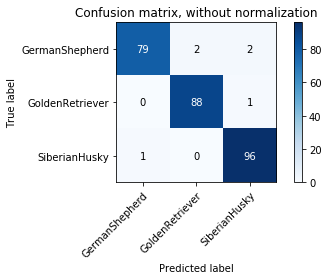

In [29]:
import numpy as np
r_y_true = resnet_test_generator.classes
r_y_pred = predict.argmax(axis=1)
plot_confusion_matrix(r_y_true, r_y_pred, classes=['GermanShepherd', 'GoldenRetriever', 'SiberianHusky'],
                      title='Confusion matrix, without normalization')